In [3]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from pyHalo.PresetModels.wdm import WDM_mixed, WDM
from pyHalo.PresetModels.cdm import CDM


## Mixed warm and cold dark matter

This impelemnts the mass function model for mixed dark matter presented by Keeley et al. (2023)
https://arxiv.org/pdf/2301.07265.pdf
    


In [4]:
zlens, zsource = 0.5, 2.5
mixed_DM_frac = 0.7 # fraction in CDM
log_mc = 8.0 # half-mode scale of WDM component
realization_mixedDM = WDM_mixed(zlens, zsource, log_mc, mixed_DM_frac, 
                                cone_opening_angle_arcsec=10)

realizationCDM = CDM(zlens, zsource, cone_opening_angle_arcsec=10)
realizationWDM = WDM(zlens, zsource, log_mc=log_mc, cone_opening_angle_arcsec=10)

pure WDM realization contains 746 halos.
mixed realization contains 8639 halos.
CDM realization contains 16669 halos.


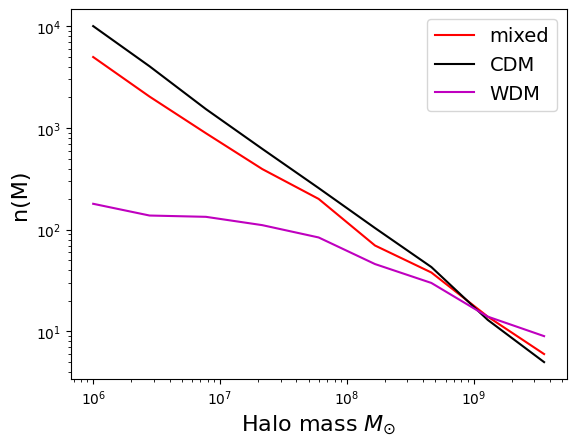

In [5]:
print('pure WDM realization contains '+str(len(realizationWDM.halos))+' halos.')
print('mixed realization contains '+str(len(realization_mixedDM.halos))+' halos.')
print('CDM realization contains '+str(len(realizationCDM.halos))+' halos.')

halo_masses = [halo.mass for halo in realization_mixedDM.halos]
halo_masses_cdm = [halo.mass for halo in realizationCDM.halos]
halo_masses_wdm = [halo.mass for halo in realizationWDM.halos]
N_mixedDM, m = np.histogram(halo_masses, bins=np.logspace(6, 10, 10))
Ncdm, mcdm = np.histogram(halo_masses_cdm, bins=np.logspace(6, 10, 10))
Nwdm, mwdm = np.histogram(halo_masses_wdm, bins=np.logspace(6, 10, 10))

plt.loglog(m[0:-1], N_mixedDM, color='r', label='mixed')
plt.loglog(mcdm[0:-1], Ncdm, color='k', label='CDM')
plt.loglog(mwdm[0:-1], Nwdm, color='m', label='WDM')
plt.xlabel('Halo mass '+r'$M_{\odot}$', fontsize=16)
plt.ylabel('n(M)', fontsize=16)
plt.legend(fontsize=14)